In [5]:
import pandas as pd
import matplotlib.pyplot as plt
excel = pd.ExcelFile('basedados.xlsx')
print (excel.sheet_names)

data = excel.parse(0)

data.head()

# Abrindo a planilha para ter-se uma primeira noção de como está organizada

# O detalhe mais óbvio é perceber que existem sorteios pontualmente toda semana 
# (sinceramente eu não sabia, imaginava que eram mensais)

[u'MegaSena']


,Concurso,Data Sorteio,Dezena1,Dezena2,Dezena3,Dezena4,Dezena5,Dezena6,Arrecadacao_Total,Ganhadores_Sena,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio
0,1,1996-03-11,41,5,4,52,30,33,0.0,0,0.00,17,39158.92,2016,330.21,SIM,1714650.23,0
1,2,1996-03-18,9,39,37,49,43,41,0.0,1,2307162.23,65,14424.02,4488,208.91,NÃO,0.00,0
2,3,1996-03-25,36,30,10,11,29,47,0.0,2,391192.51,62,10515.93,4261,153.01,NÃO,0.00,0
3,4,1996-04-01,6,59,42,27,1,5,0.0,0,0.00,39,15322.24,3311,180.48,SIM,717080.75,0
4,5,1996-04-08,1,19,46,6,16,2,0.0,0,0.00,98,5318.10,5399,96.53,SIM,1342488.85,0


In [6]:
# Nesta celula analiso quais dezenas foram sorteadas com maior frequência em todos os sorteios
# do dataset
cols = ['Dezena1','Dezena2','Dezena3','Dezena4','Dezena5','Dezena6'] 
unsta = data.copy()

unsta = unsta[cols]
unsta = unsta.unstack().value_counts()
unsta
# possivelmente o apostador em questão tenha uma probabilidade maior de ganhar algum dos prêmios
# utilizando os seis primeiros numeros (os quais sao os sorteados com mais frêquencia)

5     233
53    230
10    227
23    224
4     224
54    221
51    220
24    220
33    219
17    218
52    217
28    217
42    216
32    215
30    213
43    212
16    211
41    210
34    210
50    209
2     209
13    209
36    208
29    207
37    207
56    207
27    206
44    205
6     204
1     202
8     202
59    201
45    201
18    201
47    200
49    200
35    200
12    199
38    197
20    195
58    195
11    195
31    194
46    193
40    191
3     191
7     191
60    190
48    190
14    189
39    188
57    188
19    186
25    184
9     183
15    183
21    178
22    177
55    174
26    164
dtype: int64

In [14]:
# Nesta celula recolhemos a data do primeiro sorteio e do ultimo para sabermos há quanto tempo
# a megasena existe
d1 = data['Data Sorteio'][0]
d2 = data['Data Sorteio'].iloc[-1]
print("Primeiro sorteio: ",d1)
print("Ultimo sorteio: " ,d2)
diferenca = (2018-1996)*365 + (3 -3)*30 + (24-11) # diferença em dias
diferenca = diferenca/365 # diferença em anos
print ("Diferença em anos entre o primeiro e ultimo sorteio: ", int(diferenca))

# Surpreendentemente existem sorteios semanais há 22 anos !!!
# Isso nos levar a ponderar, certamente deve ser muito lucrativo para quem administra a megasena
# a próxima celula nos dará uma pequena dica do porquê

('Primeiro sorteio: ', Timestamp('1996-03-11 00:00:00'))
('Ultimo sorteio: ', Timestamp('2018-03-24 00:00:00'))
('Diferen\xc3\xa7a em anos entre o primeiro e ultimo sorteio: ', 22)


In [8]:
# Aqui separamos os concursos em acumulados e não-acumulados 
acumulados = 0;
for x in data.Acumulado:
    if x == 'SIM':
        acumulados = acumulados +1
        
print (acumulados)

print (str(int (acumulados*100/len(data.Concurso))) + '%')

# Surpreendentemente 76% dos concursos são acumulados! certamente é um negócio mais do que vantajoso.
# Atualmente o preço mínimo para um jogo na megasena é de R$ 3,50.
# Supondo que 1 milhão de pessoas comprasse toda semana, seria um lucro de 3 milhões
# e meio de reais, e como apenas 25% dos concursos não são acumulados podemos dizer que
# apenas 1 vez no mês um concurso é ganho. Neste prazo ja teria sido arrecadado 14 milhões!

1548
76%


In [9]:
# Nesta célula podemos ver que nossas expectativas se confirmaram, em média a quantidade
# de dinheiro acumulada é praticamente o dobro da quantidade de dinheiro 'perdida'
# pelos administradores do evento quando alguem vence.

# Copiamos a celula para nao correr o risco de modificar o dataset original
data_novos = data.copy()
# Usamos a formula Premio_maximo = Numero de ganhadores * rateio 
# Assim, saberemos quanto seria o prêmio caso apenas uma pessoa tivesse ganhado
# (ou quanto dinheiro foi retirado do lucro dos administradores da mega sena)
data_novos['premio_maximo'] = data['Ganhadores_Sena'] * data ['Rateio_Sena'] 

print(data.Valor_Acumulado.mean())
print(data_novos.premio_maximo.mean())

12334568.118
5968183.41827


In [10]:
# Ainda que juntássemos o valor dos prêmios da Quadra e da Quina 
# haveria um lucro significativo de 20 milhões em media
data_novos['premio_maximo_total'] = data_novos['premio_maximo'] + data['Ganhadores_Quadra'] \
                                                                * data['Rateio_Quadra']

data_novos['premio_maximo_total'] += data["Ganhadores_Quina"] * data['Rateio_Quina']
print(data.Valor_Acumulado.mean())
print(data_novos.premio_maximo_total.mean())

12334568.118
10491209.3473


In [11]:
# E isto são comparações feitas apenas com os acumulados da Sena!!! 
# A discrepância da arredação com o gasto em prêmios salta aos olhos quando comparados
# com a arredação bruta

print(data.Arrecadacao_Total.mean())
print(data_novos.premio_maximo_total.mean())
# A media de arrecadação é mais do que o dobro da media dos valores dos prêmios!!! porém observe :
print(data.Arrecadacao_Total.head())

22673370.7841
10491209.3473
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Arrecadacao_Total, dtype: float64


In [31]:
# Em primeiro relance podemos ver que em alguns concursos o valor da arrecadação total
# não era divulgado. Assim, retiraremos do dataset todos os concursos com arrecadação não 
# computada para termos mais credibilidade em nossa analise

exclusao = []
for index,arrec in enumerate(data.Arrecadacao_Total):
    if arrec == 0:
        exclusao.append(index)

        
bad_df = data.index.isin(exclusao)
data_arrec = data[~bad_df].copy()
# Agora podemos comparar a arrecadação com a media dos premios em concursos cuja arrecadação
# foi divulgada.
# Antes, faremos novamente o calculo para os prêmios totais, porém na data_arrec
data_arrec['premio_maximo_total'] = data_arrec['Ganhadores_Sena'] * data_arrec['Rateio_Sena']
data_arrec['premio_maximo_total'] += data_arrec['Ganhadores_Quadra'] * data_arrec['Rateio_Quadra']
data_arrec['premio_maximo_total'] += data_arrec['Ganhadores_Quina'] * data_arrec['Rateio_Quina']

print("Media de arrecadacao: ",data_arrec.Arrecadacao_Total.mean())
print("Media da premiacao:   ", data_arrec.premio_maximo_total.mean())

# Podemos observar que a média da arrecadação é mais do que o triplo da média das premiações.
# Podemos afirmar conforme estas evidências que é inegavelmente uma bela forma de arrecadar dinheiro
# Entretanto, algo nos salta aos olhos: a média das premiações aumentou, por quê?

('Media de arrecadacao: ', 48077042.76204188)
('Media da premiacao:   ', 15973950.534670161)


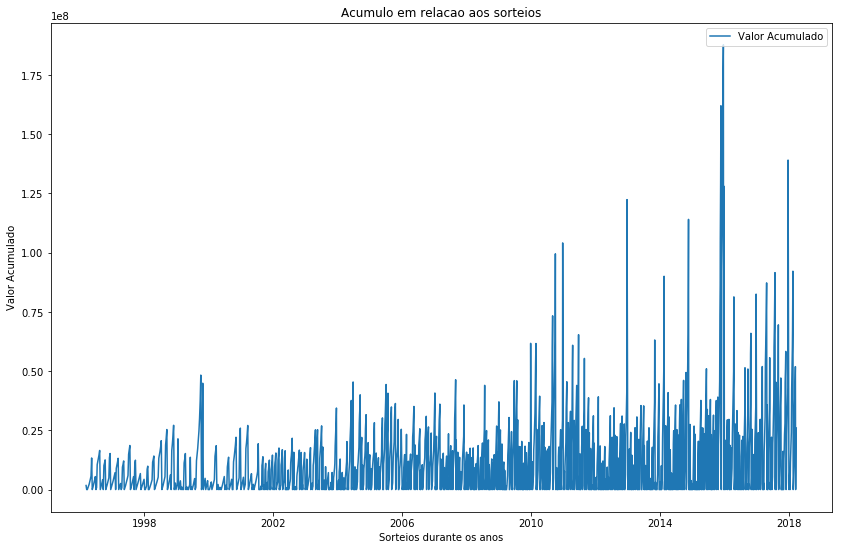

In [29]:
# O gráfico abaixo nos permite inferir duas possíveis conclusões a partir do fato de que o valor acumulado 
# aumentou com os anos, mas vemos também diversos picos no grafico, uma sugestao inicial pode ser que sejam estes 
# os periodos onde a sena havia acumulado muito( fazendo com que muitos quisessem arriscar).
# Voltando a nossa duvida inicial, podemos inferir duas coisas: 
# 1) O preço da mega-sena aumentou com os anos, algo que aconteceu sem dúvida, devido a inflacão.
# 2) A quantidade de pessoas que se arriscam na mega-sena aumentou, será que a promessa de um futuro milionario 
#    realmente tomou as redeas dos sonhos da populacão brasileira?

fig = plt.figure(figsize=(14,9))
plt.plot(data['Data Sorteio'], data['Valor_Acumulado'],label='Valor Acumulado')
plt.ylabel('Valor Acumulado')
plt.xlabel('Sorteios durante os anos')
plt.legend(loc='upper right')
plt.title('Acumulo em relacao aos sorteios')
plt.show()